<a href="https://colab.research.google.com/github/seojeongbin/web1/blob/master/%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 재탐색 및 두번째 회의

### 가장 의문점
* 데이터 타입 변경 관련 -> 일단 다 float으로? category?
* 범주형 변수를 어떻게 컨트롤하는가? dummy화? 원핫인코딩? -> 칼럼 여러개 난리난다... 

## 0. 데이터 준비 (현부형 코드 차용)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') # 한번 실행시키고 런타임 다시실행 시키기 !!!! "런타임 다시시작"을 눌러야함. 다른거말고

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [114]:
data = pd.read_csv("대회데이터.csv", encoding='cp949')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
data.columns = data.iloc[0,:]
data = data.iloc[1:,:]
data = data.reset_index(drop = True)
data = data.reset_index(drop = False)

data

,index,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,0,1,46,21.9,30,DZB,1,23,PL233,194,827
1,1,2,33.9,111.8,12,A,46,23,PL233,324,2906
2,2,3,49.5,33.5,13,A,2,23,PL234,241,1003
3,3,4,75.7,174.9,13,A,35,23,PL233,483,4412
4,4,5,66.5,66.6,13,A,7,23,PL233,331,1601
...,...,...,...,...,...,...,...,...,...,...,...
162320,162320,162337,139.8,162,19,AH32,31,23,PL231,827,2899
162321,162321,162338,18.5,28.9,16,A,56,25,PL252,165,930
162322,162322,162339,63.7,25.6,15,AH32,1,26,PL261,345,696
162323,162323,162340,94.7,61.4,19,AH32,2,26,PL261,0,2155


## 1. 데이터 확인 

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162325 entries, 0 to 162324
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   162325 non-null  int64 
 1   작업번호    162325 non-null  object
 2   마킹길이    162325 non-null  object
 3   절단길이    162325 non-null  object
 4   철판두께    162325 non-null  object
 5   철판재질    162325 non-null  object
 6   절단갯수    162325 non-null  object
 7   작업장     162325 non-null  object
 8   절단장비    162325 non-null  object
 9   마킹시간    162325 non-null  object
 10  절단시간    162325 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


In [117]:
del data['index']
data.columns

Index(['작업번호', '마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '절단장비', '마킹시간',
       '절단시간'],
      dtype='object', name=0)

In [118]:
data.작업번호 = data.작업번호.astype(float)
data.마킹길이 = data.마킹길이.astype(float)
data.절단길이 = data.절단길이.astype(float)
data.철판두께 = data.철판두께.astype(float)
data.절단갯수 = data.절단갯수.astype(float)
data.작업장 = data.작업장.astype(float)
data.마킹시간 = data.마킹시간.astype(float)
data.절단시간 = data.절단시간.astype(float)

* 범주형 피쳐는 타입변경 하지 않았음
* 범주형 피쳐에 대한 빈도 분석 실시

In [119]:
def bar_plot(x): 
  var = data[x]
  var_value = var.value_counts()
  plt.figure(figsize=(50,10))
  plt.bar(var_value.index, var_value)
  plt.xticks(var_value.index, var_value.index.values)
  plt.ylabel("빈도")
  plt.title(x)
  plt.show()

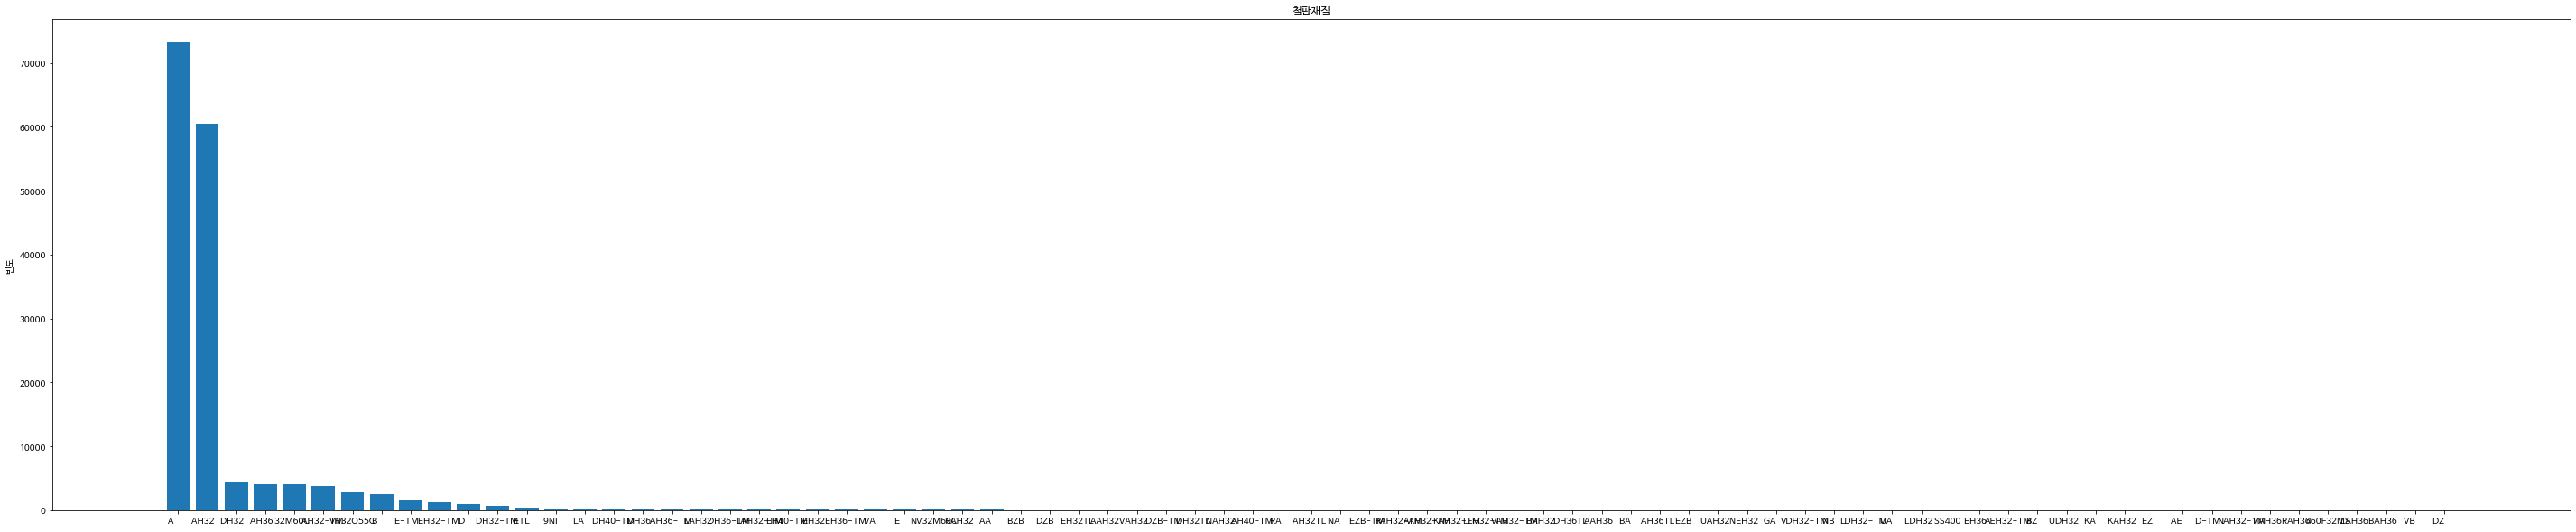

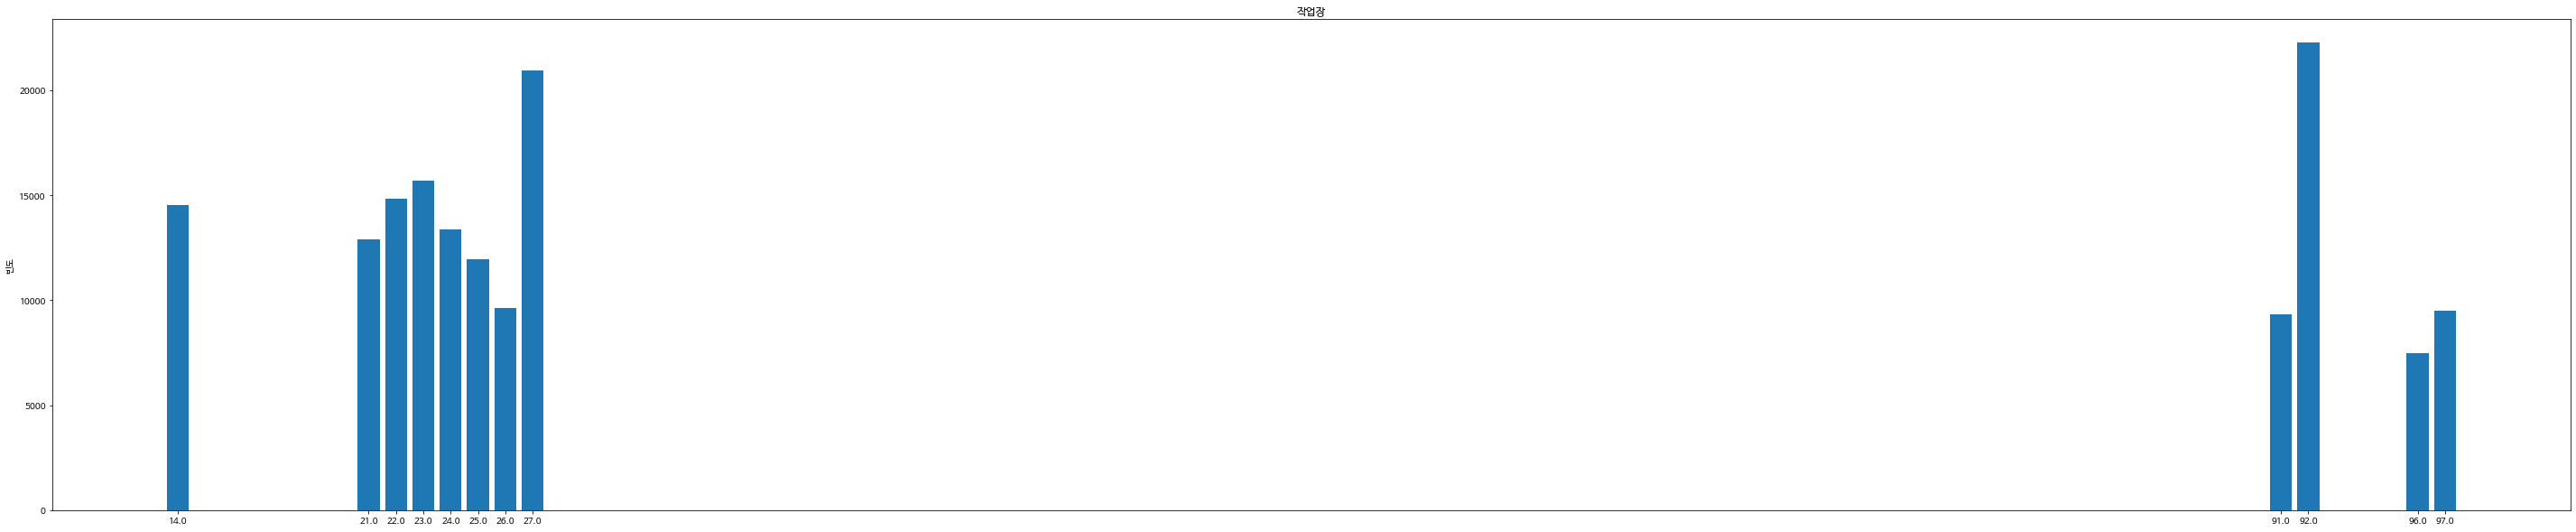

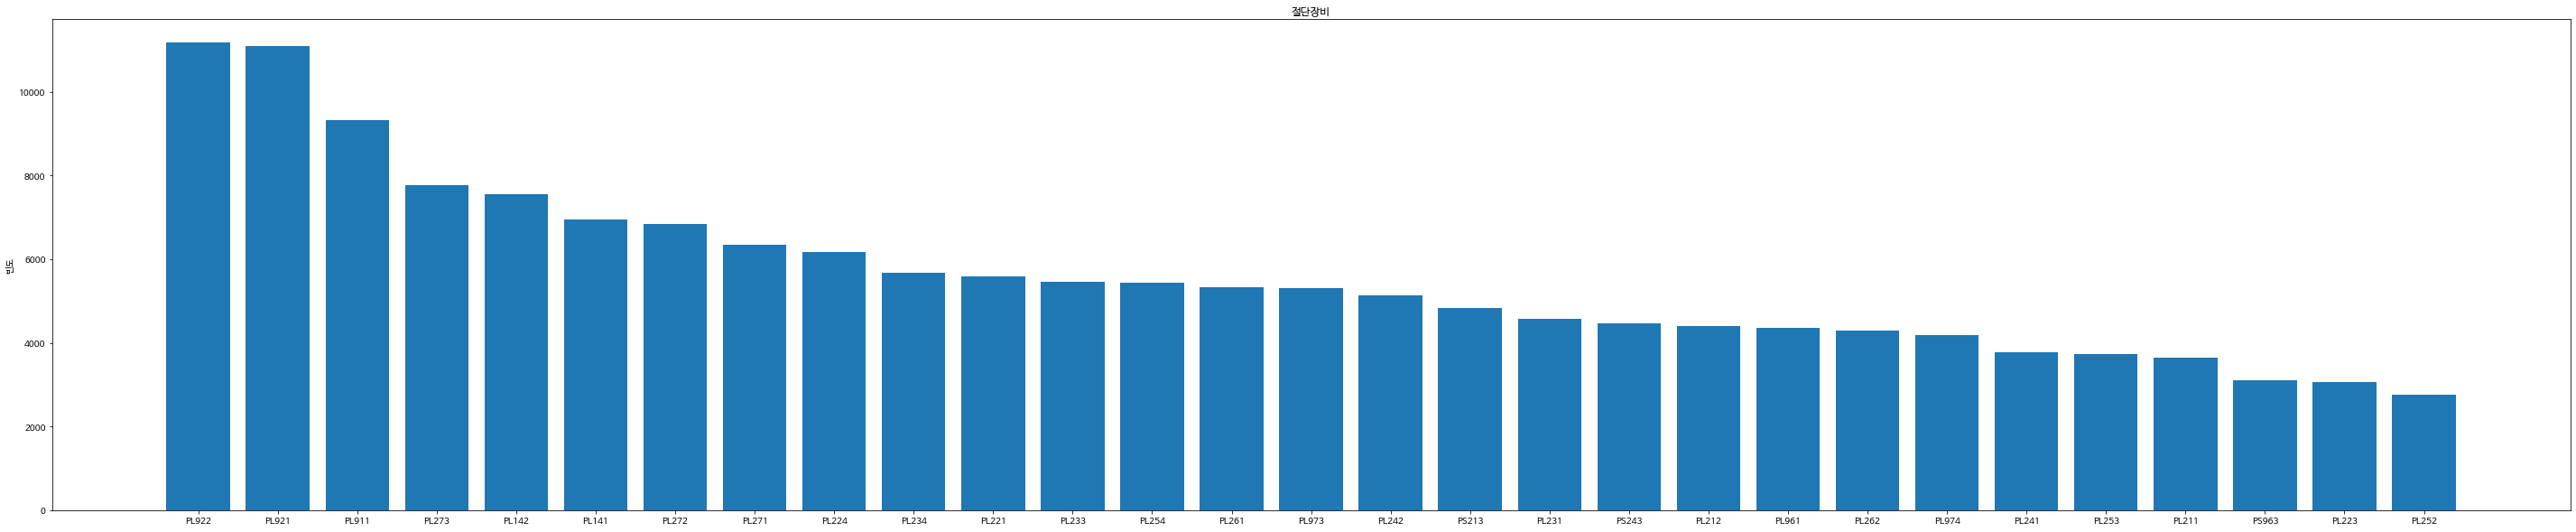

In [120]:
category1 = ["철판재질", "작업장", "절단장비"] 
for c in category1:
  bar_plot(c)

In [121]:
print(data['철판재질'].unique())
print(data['절단장비'].unique())

['DZB     ' 'A       ' 'B       ' 'AH32    ' 'AH36    ' 'DH32    '
 'EH32-TM ' 'AH32-TM ' 'DZB-TM  ' 'AH32TL  ' 'RAH32   ' 'RA      '
 'DZ      ' 'EH36-TM ' 'AH36-TM ' 'DH36    ' 'DH36-TM ' 'DH40-TM '
 'EH40-TM ' 'AH40-TM ' 'DH32-TM ' 'BZB     ' 'EZ      ' 'E-TM    '
 'EZB     ' 'ETL     ' 'D       ' 'EH32TL  ' 'EZB-TM  ' 'BA      '
 'BAH32   ' 'E       ' 'VAH32   ' 'BAH36   ' 'VH32O55C' 'UAH32   '
 'AA      ' 'RAH32-TM' 'GA      ' 'LAH32   ' 'LDH32-TM' 'LAH32-TM'
 'LA      ' 'LDH32   ' 'NA      ' 'LEH32-TM' 'DH32TL  ' 'VA      '
 'RAH36   ' 'KA      ' 'KAH32   ' 'KAH32-TM' 'EH32    ' 'NB      '
 'NAH32   ' 'VAH36   ' '32M60C  ' 'NV32M60C' 'AAH32-TM' 'AAH32   '
 'AH36TL  ' '460F32MS' 'NEH32   ' 'VAH32-TM' 'SS400   ' 'D-TM    '
 'VDH32-TM' 'UA      ' 'UDH32   ' 'VB      ' 'NAH32-TM' 'AAH36   '
 'AEH32-TM' 'BZ      ' 'AE      ' 'LAH36   ' 'EH36    ' '9NI     '
 'DH36TL  ']
['PL233' 'PL234' 'PL231' 'PL223' 'PL273' 'PL272' 'PL271' 'PL261' 'PL262'
 'PL253' 'PL254' 'PL212' 'PS213' 'PL221' 'P

* 철판재질 : 'A'와 'AH32'재질에서 대부분의 작업이 이루어짐(82.3퍼센트 비율)
  * 따라서 이 두가지의 재질이 아닌 다른재질에서 이루어지는 작업의 경우 어떤 차이점이 있는지 살펴볼 필요가 있지 않을까 생각이 듦
* 작업장, 절단장비 : 비교적 고른 빈도
 

## 이상치 탐색 후 데이터 분석 
* "data2" 라고 명명

In [122]:
from collections import Counter
def detect_outliers(df,features):
  outlier_indices = [] 
  for c in features:
    Q1 = np.percentile(df[c],25)
    Q3 = np.percentile(df[c],75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
  return multiple_outliers

In [123]:
data.loc[detect_outliers(data,['작업번호', '마킹길이', '절단길이', '철판두께', '절단갯수', '마킹시간','절단시간'])]
data2 = data.drop(detect_outliers(data,['작업번호', '마킹길이', '절단길이', '철판두께', '절단갯수', '마킹시간','절단시간']))
data2

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,1.0,46.0,21.9,30.0,DZB,1.0,23.0,PL233,194.0,827.0
1,2.0,33.9,111.8,12.0,A,46.0,23.0,PL233,324.0,2906.0
2,3.0,49.5,33.5,13.0,A,2.0,23.0,PL234,241.0,1003.0
3,4.0,75.7,174.9,13.0,A,35.0,23.0,PL233,483.0,4412.0
4,5.0,66.5,66.6,13.0,A,7.0,23.0,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...
162320,162337.0,139.8,162.0,19.0,AH32,31.0,23.0,PL231,827.0,2899.0
162321,162338.0,18.5,28.9,16.0,A,56.0,25.0,PL252,165.0,930.0
162322,162339.0,63.7,25.6,15.0,AH32,1.0,26.0,PL261,345.0,696.0
162323,162340.0,94.7,61.4,19.0,AH32,2.0,26.0,PL261,0.0,2155.0


* 아웃라이어 탐색 결과
  * 162,325 -> 157,129 로 데이터 정제
* **독립변수가 아니므로 이상치 제거를 하는것이 옳은 행동인지는 모르겠지만 일단 대략적인 상관성 파악의 목적으로 수행해보았습니다**

### 타겟값과 어느정도 연관성을 가질까 

#### 범주형 데이터 파악 : barplot 이용 

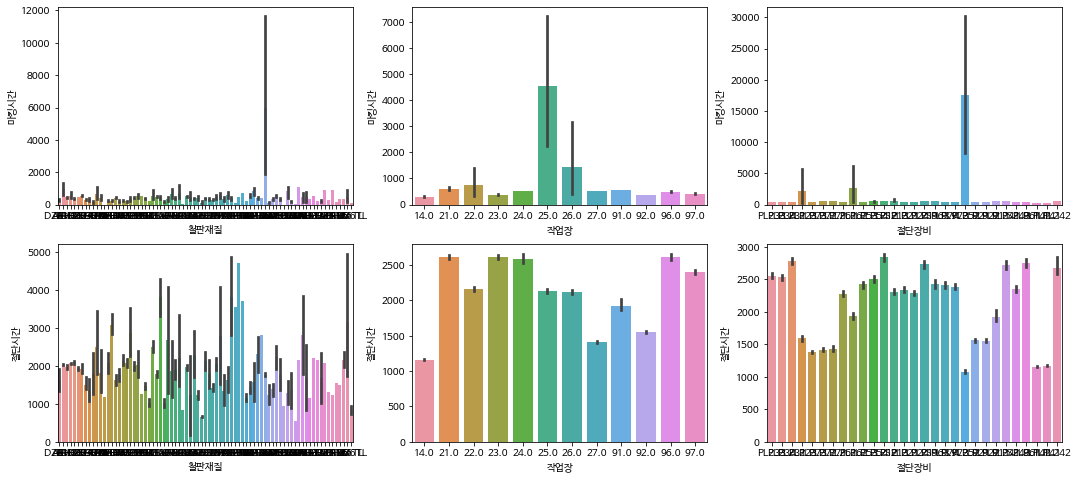

In [124]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=data2, x="철판재질", y="마킹시간", ax=ax1)
sns.barplot(data=data2, x="작업장", y="마킹시간", ax=ax2)
sns.barplot(data=data2, x="절단장비", y="마킹시간", ax=ax3)

sns.barplot(data=data2, x="철판재질", y="절단시간", ax=ax4)
sns.barplot(data=data2, x="작업장", y="절단시간", ax=ax5)
sns.barplot(data=data2, x="절단장비", y="절단시간", ax=ax6)


* 검정막대 의미 = 신뢰구간 (https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)
* **마킹시간**
* 특정 철판재질, 절단장비 하나에 한해서 마킹시간이 많이소요되는 결과값이 있다
* 작업장은 25번과 26번을 이용할경우 마킹시간이 많이소요 되었다
* **절단시간**
* 25번 26번 작업장이라고 절단시간도 많이 소요되지는 않았다
* 절단장비는 마킹시간에 비해 절단시간에는 튀는 결과가 보이지는 않았다


#### 연속형 데이터 파악 : lineplot 이용 

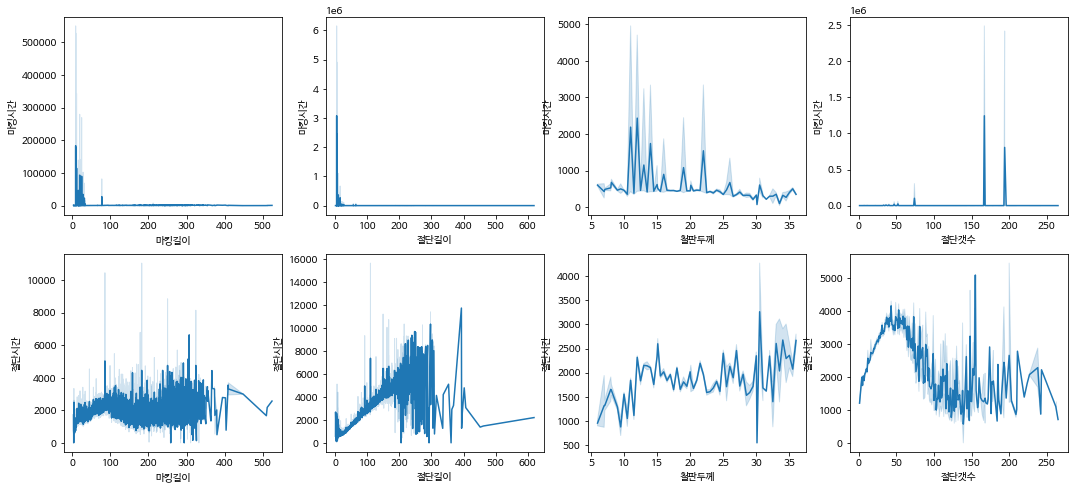

In [125]:
figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(18,8)


sns.lineplot(data=data2, x="마킹길이", y="마킹시간", ax=ax1)
sns.lineplot(data=data2, x="절단길이", y="마킹시간", ax=ax2)
sns.lineplot(data=data2, x="철판두께", y="마킹시간", ax=ax3)
sns.lineplot(data=data2, x="절단갯수", y="마킹시간", ax=ax4)

sns.lineplot(data=data2, x="마킹길이", y="절단시간", ax=ax5)
sns.lineplot(data=data2, x="절단길이", y="절단시간", ax=ax6)
sns.lineplot(data=data2, x="철판두께", y="절단시간", ax=ax7)
sns.lineplot(data=data2, x="절단갯수", y="절단시간", ax=ax8)


* **마킹시간 관련**
* (하늘색 음영구간은 신뢰구간을 의미합니다)
* 마킹길이와, 절단길이가 짧을수록 마킹 소요시간이 적었음
* 철판두께는 두꺼워질수록 마킹소요시간이 많이 걸린다거나 하지않았음
  * 특정 두께부터 장비,작업장,철판재질등이 바뀐것은 아닐까 예상이 되었음
* **절단시간 관련**
* 절단길이가 300정도에서 어느정도 선대칭적인 양상을 보였음
* 철판두께는 마킹시간에서와 달리 조금이나마 비례적인 양상을 보였음
* 절단갯수의 경우 전체적으로 4차함수의 형태를 보였음 (극점3군데) 


In [126]:
data2.corr()

,작업번호,마킹길이,절단길이,철판두께,절단갯수,작업장,마킹시간,절단시간
0,,,,,,,,
작업번호,1.000000,0.033425,0.012118,-0.026327,-0.003941,0.010438,-0.003129,-0.000253
마킹길이,0.033425,1.000000,0.070738,0.047666,-0.211744,0.045575,-0.007260,0.038554
절단길이,0.012118,0.070738,1.000000,-0.254873,0.536444,-0.006291,-0.009843,0.574958
철판두께,-0.026327,0.047666,-0.254873,1.000000,-0.298483,0.013232,-0.006430,0.002203
절단갯수,-0.003941,-0.211744,0.536444,-0.298483,1.000000,-0.050707,0.020262,0.306228
작업장,0.010438,0.045575,-0.006291,0.013232,-0.050707,1.000000,-0.005653,-0.011114
마킹시간,-0.003129,-0.007260,-0.009843,-0.006430,0.020262,-0.005653,1.000000,-0.004314
절단시간,-0.000253,0.038554,0.574958,0.002203,0.306228,-0.011114,-0.004314,1.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


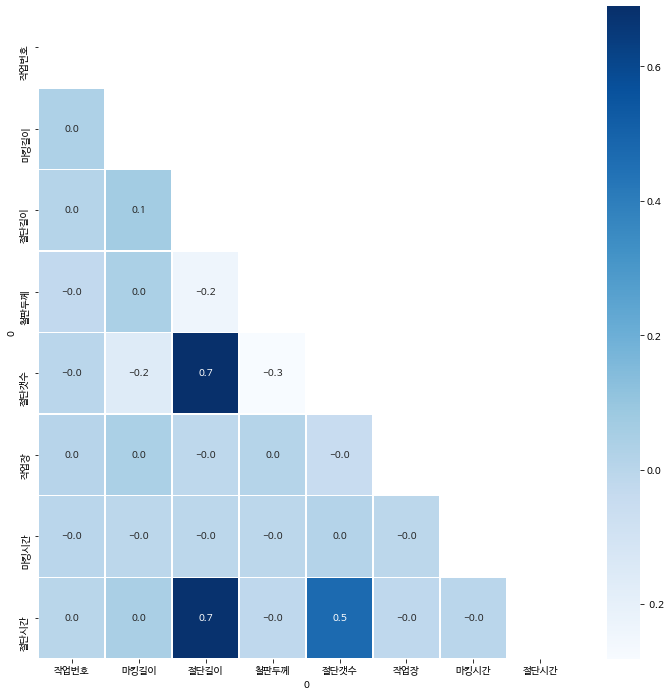

In [127]:
f, ax = plt.subplots(figsize=(12,12))
mask = np.zeros_like(data2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4, linecolor='white', fmt='.1f', ax=ax, cmap='Blues', mask=mask)
plt.show()

* 역시나 작업번호는 다른 속성값과 거의 연관을 갖지못함. 해당 속성을 삭제해주기로 함
  * 하지만 2번문제 진행시에, 작업번호 명명이 팀별 임의로 가능한지 여부에 따라 삭제하면 안될수도 있겠단 생각도 들었음 
* 절단갯수, 절단시간이 절단길이와 연관성을 / 절단시간과 절단갯수가 어느정도 연광성을 가짐
  * 해당 결과를 바로 받아들일것이 아니라 재질별, 작업장별 작업내용이 동일한것이 아니므로 편상관분석의 필요성을 느낌 

## 편상관분석
* 상관계수 방법선택 : pearson, spearman 등 여러개 있음을 확인하였습니다
* https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/perform-the-analysis/select-the-method/
* 일단 가장 많이 쓰이는 대로 pearson으로 돌려보았습니다


### pingouin 라이브러리 사용
* 라이브러리 자체 지식은 부족한 편이며, 구글링을 통해 해당 라이브러리의 존재를 알게되었습니다
* 영어로 열심히 구글링 하다 알게되었고, 국내에서도 정보가 없는 편인듯 합니다
* 라이브러리 공홈 : https://pingouin-stats.org/generated/pingouin.partial_corr.html
* **코드소개**
parial_corr(data=자료, x='독립변수', y='종속변수',' covar = '통제변수')

In [128]:
# 라이브러리 설치
!pip install pingouin

### 범주형 데이터처리 : dummy 처리 

In [129]:
data

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간
0,1.0,46.0,21.9,30.0,DZB,1.0,23.0,PL233,194.0,827.0
1,2.0,33.9,111.8,12.0,A,46.0,23.0,PL233,324.0,2906.0
2,3.0,49.5,33.5,13.0,A,2.0,23.0,PL234,241.0,1003.0
3,4.0,75.7,174.9,13.0,A,35.0,23.0,PL233,483.0,4412.0
4,5.0,66.5,66.6,13.0,A,7.0,23.0,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...
162320,162337.0,139.8,162.0,19.0,AH32,31.0,23.0,PL231,827.0,2899.0
162321,162338.0,18.5,28.9,16.0,A,56.0,25.0,PL252,165.0,930.0
162322,162339.0,63.7,25.6,15.0,AH32,1.0,26.0,PL261,345.0,696.0
162323,162340.0,94.7,61.4,19.0,AH32,2.0,26.0,PL261,0.0,2155.0


* 다시 원데이터 16만여개로 복귀, 및 해당 데이터 사용

In [130]:
onehot = pd.get_dummies(data, columns = ['철판재질','작업장','절단장비'])
data3 = pd.concat([data, onehot], axis=1)
data3.head()

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간,절단시간,작업번호,마킹길이,절단길이,철판두께,절단갯수,마킹시간,절단시간,철판재질_32M60C,철판재질_460F32MS,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,...,작업장_21.0,작업장_22.0,작업장_23.0,작업장_24.0,작업장_25.0,작업장_26.0,작업장_27.0,작업장_91.0,작업장_92.0,작업장_96.0,작업장_97.0,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963
0,1.0,46.0,21.9,30.0,DZB,1.0,23.0,PL233,194.0,827.0,1.0,46.0,21.9,30.0,1.0,194.0,827.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,33.9,111.8,12.0,A,46.0,23.0,PL233,324.0,2906.0,2.0,33.9,111.8,12.0,46.0,324.0,2906.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,49.5,33.5,13.0,A,2.0,23.0,PL234,241.0,1003.0,3.0,49.5,33.5,13.0,2.0,241.0,1003.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,75.7,174.9,13.0,A,35.0,23.0,PL233,483.0,4412.0,4.0,75.7,174.9,13.0,35.0,483.0,4412.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,66.5,66.6,13.0,A,7.0,23.0,PL233,331.0,1601.0,5.0,66.5,66.6,13.0,7.0,331.0,1601.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
a = data3.columns
a.to_list()

aa = []
for i in a :
  if i[0:4] != '철판재질' or '마킹시간':
    continue
  aa.append(i) 
print(aa)
# 도대체 왜 안되지?

[]


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162325 entries, 0 to 162324
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   작업번호    162325 non-null  float64
 1   마킹길이    162325 non-null  float64
 2   절단길이    162325 non-null  float64
 3   철판두께    162325 non-null  float64
 4   철판재질    162325 non-null  object 
 5   절단갯수    162325 non-null  float64
 6   작업장     162325 non-null  float64
 7   절단장비    162325 non-null  object 
 8   마킹시간    162325 non-null  float64
 9   절단시간    162325 non-null  float64
dtypes: float64(8), object(2)
memory usage: 12.4+ MB


In [133]:
# 이런식으로 알려주는 라이브러리 이긴 합니다 ㅜㅜ

from pingouin import partial_corr
partial_corr(data=data, x='마킹길이', y='마킹시간', covar=['절단길이', '작업번호'], method='pearson')


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,162325,-0.006351,"[-0.01, -0.0]",0.00004,0.000028,0.010506,0.082,0.725335


* pingouin 라이브러리는 연속형 데이터만 가능한듯 하다
* 범주형 데이터는 검색결과 카이제곱으로 접근해야 한다는 결과가 있었습니다.. 

In [134]:
from pingouin import partial_corr
partial_corr(data=data3, x='철판재질', y='마킹시간', covar=['절단길이', '작업번호'], method='pearson')

AttributeError: ignored

* 이렇게 범주형 데이터가 들어가면 어떻게 컨트롤하는지
* 원핫인코딩 쓰면 요소들이 엄청 많아지는데 어떻게 써야할지 모르겠습니다 

## 작업스케줄링에 대한 생각
* 작업장-절단장비 매칭
* 모든 작업장/절단장비의 작업이 동시에 끝나는, 하루 작업량을 최적화 하는 알고리즘
  * 문제소개 pdf를 보면 업무종료가 꼭 똑같을 필요는 없는 듯?


* 참고강의 : https://www.youtube.com/watch?v=k6bvE_a5kKw
* 위영상은 파이썬말고 C를 사용한 것 같습니다 

### 작업장 별 절단장비를 파악해보자
* **특정 철판두께별 작업환경(사용재질, 장비, 작업장)이 달라질까?**

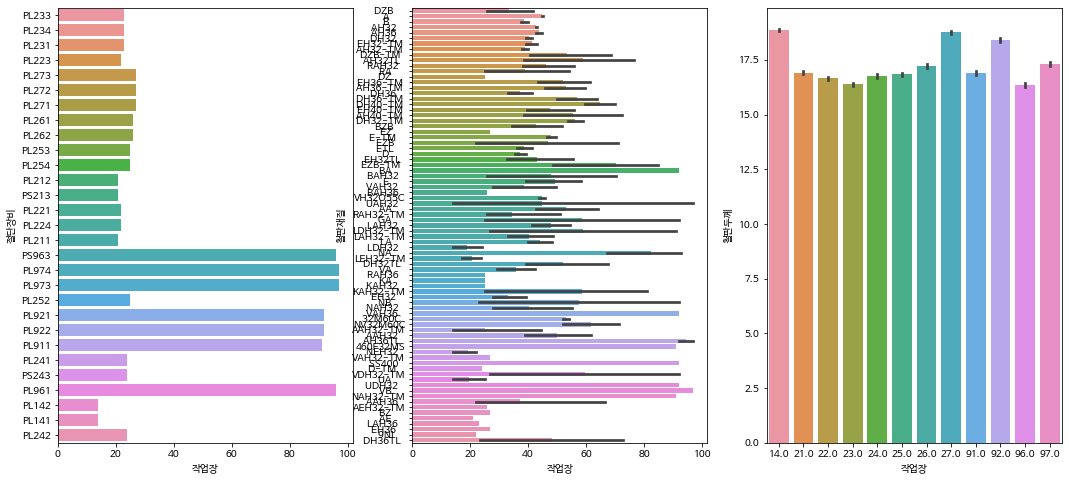

In [136]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=data, x="작업장", y="절단장비", ax=ax1)
sns.barplot(data=data, x="작업장", y="철판재질", ax=ax2)
sns.barplot(data=data, x="작업장", y="철판두께", ax=ax3)

* **검정막대는 신뢰구간을 의미합니다**
* 작업장도 범주형변수라서 첫번째, 두번째 그림같은 표현이 이상적인 표현은 아니지만 시각화를 위해서 float으로 타입변경 후 표현했습니다
* 1번) 963, 974, 973, 921, 922, 911, 961 장비만 90번대 작업장을 이용함을 알게되었습니다
  * 절단장비는 총 29종류이며, 작업장은 12개중 90번대 작업장은 4종류 입니다
* 2번) 마찬가지로 철판재질도 특정 작업장을 사용하는경우가 있음을 알게되었습니다
* 3번) 하지만 작업장별 사용 철판두께를 달리하지는 않는 것 같습니다

### 작업 알고리즘 소개 
* 구글링을 통한 내용인데 혹시 도움이 될까싶어 적어둡니다
* https://twinparadox.tistory.com/162
* 기계 할당에 관련된 내용인데 저희상황에선, 기계 -> 작업으로 생각해볼수있지 않을까... 하는 생각이 드는데 말그대로 혹시나,,,혹시나,, 참고가 될까싶어 올립니다..!
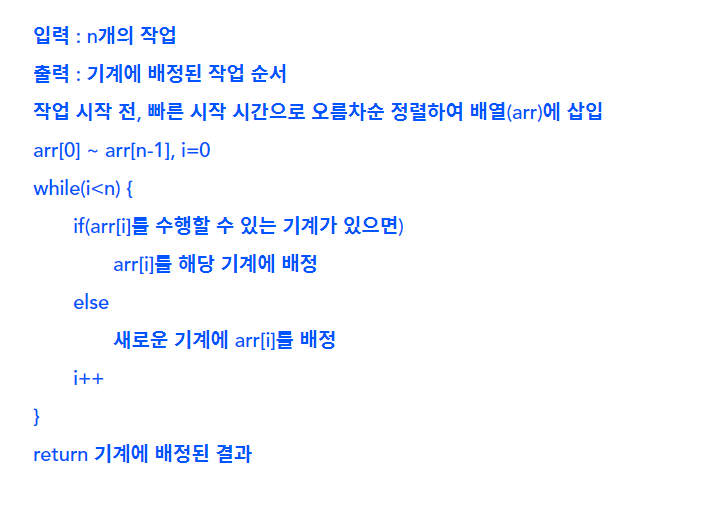

# 이상 발표 마칩니다.
* 기본이 많이 부족해서 짐이 안되고자 나름 정말 많이 공부도 해보고 자료도 찾아보고 했는데
* 밑천이 보이는 자료인것같습니다 ㅜㅜ